##### Import libraries

In [ ]:
import pandas as pd

##### Load data file

In [3]:
dataframe = pd.read_csv('./data/vgsales.csv')
dataframe.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##### Identify missing values

`.isnull()` - returns an exact copy dataframe with booleans in cells that are null

`.sum()` - returns sum of null results by column

In [4]:
missing_values = dataframe.isnull().sum()
print(missing_values) 

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


##### Handle missing values

To have a value to plot, we're just putting a median year value in empty cells

In [5]:
dataframe['Year'] = dataframe['Year'].fillna(dataframe['Year'].median())
missing_values = dataframe.isnull().sum()
print(missing_values)

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64


##### Convert Year column values to int

Knocking that .0 off the end of the year value

In [7]:
dataframe['Year'] = dataframe['Year'].astype(int)
dataframe.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##### Standardize column names: lowercase with no space

dataframe.columns returns an Index, or immutable sequence of labels

Pandas uses `.str()` to apply String methods on Series and Index

In [8]:
dataframe.columns = dataframe.columns.str.lower().str.replace(' ','_')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16598 non-null  int64  
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


##### Get summary statistics

- For mixed data types (strings and numbers) `.describe()` defaults to only analyzing numeric columns; you can pass arguments like `include='all'` to analyize everything or `include=[object']` to analyze only strings

In [10]:
dataframe.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.416134,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.781686,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


##### Find the top-selling games by year

<Axes: title={'center': 'Total Global Sales Over Time'}, xlabel='year'>

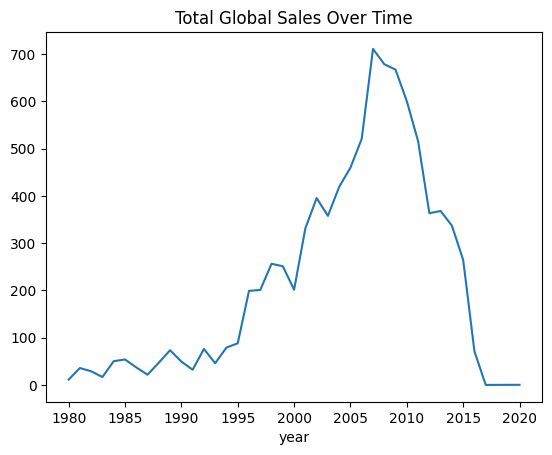

In [ ]:
# simply orders the list by the global_sales column
dataframe.sort_values(by='global_sales', ascending=False).head(10)

# groups by year first, then selects the global_sales column, then adds values to be plotted
# creates a Series (one-dimensional ndarray with labels)
dataframe.groupby('year')['global_sales'].sum().plot(kind='line', xlabel='Year', title='Total Global Sales Over Time')

# print(dataframe.groupby('year')['global_sales'].sum())

##### Plot sales trends by platform

Group by platform, select the global_sales column, then plot the values

<Axes: title={'center': 'Total sales by Platform'}, xlabel='Platform'>

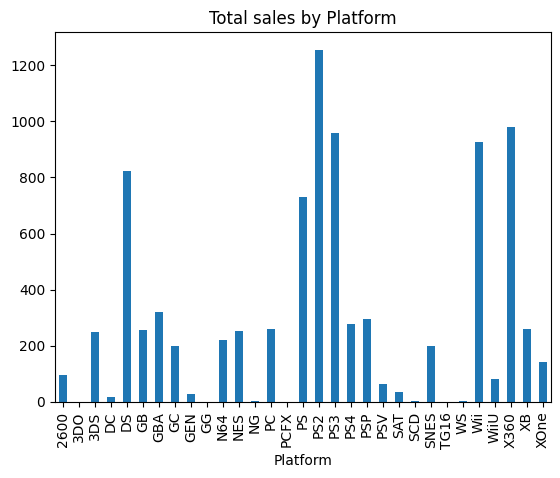

In [20]:
dataframe.groupby('platform')['global_sales'].sum().plot(kind='bar', xlabel='Platform', title="Total sales by Platform")